# Install
Next cell for important as it install all the required library that are used in this project

In [ ]:
!pip install nltk 
!pip install contractions
!pip install textblob
!pip install wordcloud

# if pandas library not installed please uncomment the following line
# !pip install pandas

# if tensorflow library not installed please uncomment the following line
# !pip install tensorflow

# if sklearn module not installed please uncomment the following line
# !pip install scikit-learn

# if seaborn module not installed please uncomment the following line
# !pip install seaborn

# if spacy module not installed please uncomment the following line
# !pip install spacy



# this protobuf version is required for tensorflow < recommended in when the code run locally>
# !pip install protobuf==3.20.0

# Imports
Next cell for important as it import all the required library and paths that are used in this project

In [1]:
import pandas as pd
from collections import Counter
import re
import nltk
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from textblob import TextBlob
import contractions
import csv
from wordcloud import WordCloud

# the for running the code in google colab
#from google.colab import drive
#drive.mount('/content/drive') # if the code will ran in local machine this must commented and uncomment the path that for the local run
#path = "/content/drive/MyDrive/dataset/" #  main folder in if the code ran in google colab
path = "dataset\\" # main folder in if the code ran in local machine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 289.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.4 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
import sys
sys.path.append(path)
from text_processor import TextProcessor
from emoji_data import EMOJI_DATA
# we need try except block here for colab or local users

# Data extraction
This includes extracting all datasets and their labels and merging them into one data frame. As a result, we will have three data frames: train, validation, and test. Each data frame has tweets and their corresponding labels.

In [3]:
#---------------- Extracting the training set and its labels---------------------#
# open the train text and extract all the lines
with open( path + 'train_text.txt', encoding='utf-8') as train_text:
    train_tweets = train_text.readlines() # read lines
train_tweets_df = pd.DataFrame({'tweets': train_tweets}) # store all the lines in dataframe

# open the train labels text file and then extract all labels and then store them in dataframe
train_tweets_labels = []
with open( path + 'train_labels.txt', 'r') as train_labels:
  for line in train_labels:
      train_tweets_labels.append(int(line.strip()))

train_tweets_labels_df = pd.DataFrame({'labels': train_tweets_labels}) # store all the lines of labels in dataframe

print('The number of extracted train tweets',len(train_tweets_df))
print('The number of extracted train tweets labels',len(train_tweets_labels_df))
print('----------------------------------------------------------')

# maping train tweets with labels
df_train = pd.merge(train_tweets_df, train_tweets_labels_df,left_index=True, right_index=True)

#---------------- Extracting the test set and its labels---------------------#

# open the train text and extract all the lines
with open( path + 'test_text.txt', encoding='utf-8') as test_text:
    test_tweets = test_text.readlines()
test_tweets_df = pd.DataFrame({'tweets': test_tweets}) # store all the lines in dataframe

# open the test labels text file and then extract all labels and then store them in dataframe
test_tweets_labels = []
with open( path + 'test_labels.txt', 'r') as test_labels:
  for line in test_labels:
      test_tweets_labels.append(int(line.strip()))

test_tweets_labels_df = pd.DataFrame({'labels': test_tweets_labels}) # store all the lines of labels in dataframe

print('The number of extracted test tweets',len(test_tweets_df))
print('The number of extracted test tweets labes',len(test_tweets_labels_df))
print('----------------------------------------------------------')

# maping test tweets with labels
df_test = pd.merge(test_tweets_df, test_tweets_labels_df,left_index=True, right_index=True)


#---------------- Extracting the valifstion set and its labels---------------------#

# open the train text and extract all the lines
with open( path + 'val_text.txt', encoding='utf-8') as val_text:
    val_tweets = val_text.readlines()
val_tweets_df = pd.DataFrame({'tweets': val_tweets}) # store all the lines in dataframe

# open the validation labels text file and then extract all labels and then store them in dataframe
val_tweets_labels = []
with open( path + 'val_labels.txt', 'r') as val_labels:
  for line in val_labels:
      val_tweets_labels.append(int(line.strip()))

val_tweets_labels_df = pd.DataFrame({'labels': val_tweets_labels}) # store all the lines of labels in dataframe

print('The number of extracted validation tweets',len(val_tweets_df))
print('The number of extracted validation tweets labes',len(val_tweets_labels_df))

# maping test tweets with labels
df_val = pd.merge(val_tweets_df, val_tweets_labels_df, left_index=True, right_index=True)

The number of extracted train tweets 9000
The number of extracted train tweets labels 9000
----------------------------------------------------------
The number of extracted test tweets 2970
The number of extracted test tweets labes 2970
----------------------------------------------------------
The number of extracted validation tweets 1000
The number of extracted validation tweets labes 1000


# descriptive analysis of the dataset

The following cell contains three functions that are used to visualise some facts about the datasets.
1. visualisation by bar chart 
2. visualisation by word cloud
3. Extracting word count


In [4]:
# this function receive the plot title and data then visualise it as bat chart
def plot(titels,data,plot_title,fontsize = 16,colors=['blue', 'green', 'red']):
  fig, ax = plt.subplots()
  ax.bar(titels, data, color=colors)
  for i, v in enumerate(data):
      ax.text(i, v/2, str(v), ha='center', va='center', color='white', fontsize=fontsize)
  ax.set_title(plot_title)
  plt.show()

# this function receive collection of words then visualise it as word cloud
def word_cloud(words): 

  # loop through the words and calculate their frequencies
  top_words_dict = {}
  for word, count in words:
        top_words_dict[word] = count

  # Generate the word cloud based on the calculated word frequencies
  wordcloud = WordCloud(width=800, height=300, background_color='white').generate_from_frequencies(top_words_dict)

  # visualising the word cloud
  plt.figure(figsize=(14, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

# this function receive words list  and title of plot then visualise is as bar chart along with thei accurance 
def bar_chart(words,plot_title,figsize=(20, 10)):
  # loop through the words and calculate their frequencies
  top_words_dict = {}
  for word, count in words:
        top_words_dict[word] = count

  # extract the word and their frequencies
  words = list(top_words_dict.keys()) 
  freqs = list(top_words_dict.values())

  # visualising the word frequencies
  fig, ax = plt.subplots(figsize=figsize) 
  plt.barh(words, freqs, color='blue')
  plt.title(plot_title)
  plt.xlabel('Frequencies',fontsize=10)
  plt.ylabel('Words',fontsize=10)
  ax.tick_params(axis='both', labelsize=20)
  for i, v in enumerate(freqs):
      ax.text(v + 3, i + .25, str(v), color='black', fontsize=16)
  plt.show()


# this function receive data frame and a number to find the most occured word based on the given number 
def get_word_count(df,quantity):
  flatten_text = ' '.join(df.tolist())
  tokens = nltk.word_tokenize(flatten_text)

  # counting the occurrences of each word
  word_counts = Counter(tokens)

  # geting the most common words and their counts based on the given number
  return word_counts.most_common(quantity)

## Data Analysis
In this part include fact visualisation about the datasets. This include the following:
1. Number of Hate labels and non Hate labels in the three datasets.
2. visualising Most common words in all the three datasets in bar chart, word cloud.
3. Hashtags distributions in all the three datasets shown in word cloud.
4. The distribution of labels based on Hashtags in all the three datasets shown in bar chart.
5. Top three hashtags distributions in all the three datasets shown in bar chart.

Hate labels count in train set 3783
Non Hate labels count in train set 5217
------------------------------------------
Hate labels count in test set 1252
Non Hate labels count in test set 1718
------------------------------------------
Hate labels count in validation set 427
Non Hate labels count in validation set 573


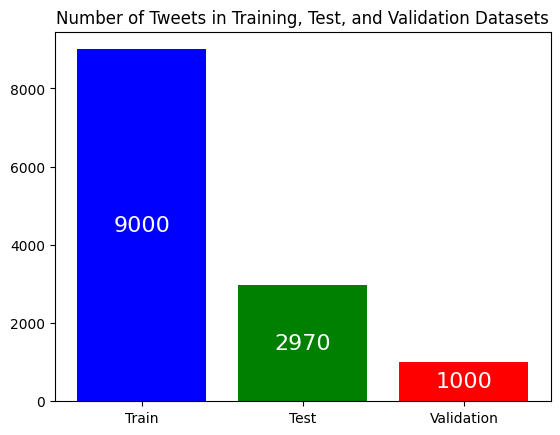

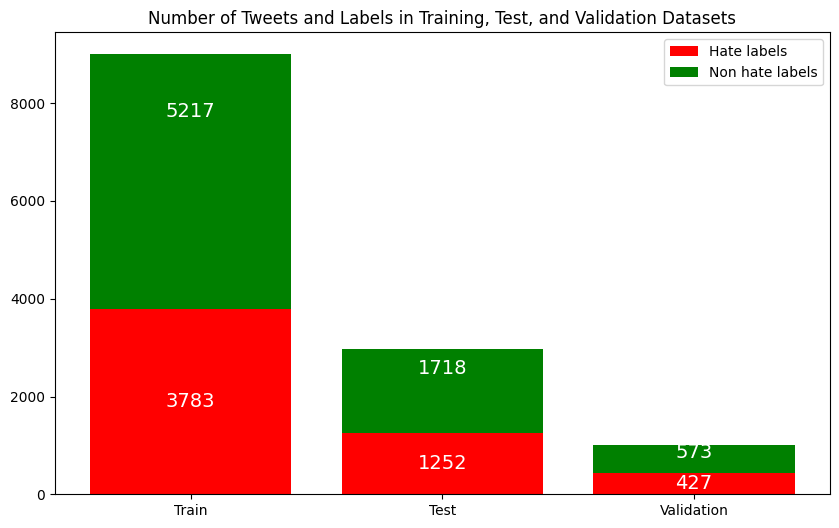

In [5]:
# counting hate and not hate labels in the train set
non_hate_train = 0
hate_train = 0
for label in train_tweets_labels:
  if label == 1:
      hate_train = hate_train + 1
  elif label == 0:
    non_hate_train = non_hate_train + 1
  
print('Hate labels count in train set',hate_train)
print('Non Hate labels count in train set',non_hate_train)
print('------------------------------------------')

# counting hate and not hate labels in the test set
non_hate_test = 0
hate_test = 0
for label in test_tweets_labels:
  if label == 1:
      hate_test = hate_test + 1
  elif label == 0:
    non_hate_test = non_hate_test + 1
  
print('Hate labels count in test set',hate_test)
print('Non Hate labels count in test set',non_hate_test)
print('------------------------------------------')

# counting hate and not hate labels in the validation set
non_hate_val = 0
hate_val = 0
for label in val_tweets_labels:
  if label == 1:
      hate_val = hate_val + 1
  elif label == 0:
    non_hate_val = non_hate_val + 1
  
print('Hate labels count in validation set',hate_val)
print('Non Hate labels count in validation set',non_hate_val)
labels = ['Train', 'Test', 'Validation']
hate_labels = [hate_train, hate_test, hate_test]
non_hate_labels = [non_hate_train, non_hate_test, non_hate_test]

#------------------- graph --------------------------#

# call plot function to visualise some fact about the datasets 
plot_title = 'Number of Tweets in Training, Test, and Validation Datasets'
labels = ['Train', 'Test', 'Validation']
tweets = [len(train_tweets_df), len(test_tweets_df), len(val_tweets_df)]
plot(labels,tweets,plot_title,fontsize = 16,colors=['blue', 'green', 'red'])


# visualising the distibution of hate and not-hate labels for each dataset
labels = ['Train', 'Test', 'Validation']
hate_labels = [hate_train, hate_test, hate_val] # storing hate values
non_hate_labels = [non_hate_train, non_hate_test, non_hate_val] # storing not hate values

#visualising hate and not hate labels 
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, hate_labels,color='r', label='Hate labels')
ax.bar(labels, non_hate_labels, bottom=hate_labels, color='g',label='Non hate labels')

# adding text labels to the chart
for i, v in enumerate(hate_labels):
    ax.text(i, v/2, str(v), ha='center', va='center', color='white', fontsize=14)
for i, v in enumerate(non_hate_labels):
    ax.text(i, v + v/2, str(v), ha='center', va='center', color='white', fontsize=14)

# Add a legend and title to the chart
ax.legend()
ax.set_title('Number of Tweets and Labels in Training, Test, and Validation Datasets')

# setting the color of the bars
ax.bar(labels, hate_labels, color='r')
ax.bar(labels, non_hate_labels, bottom=hate_labels, color='g')
plt.show()


** Visualising the top words count in the train set before data pre-procesing**



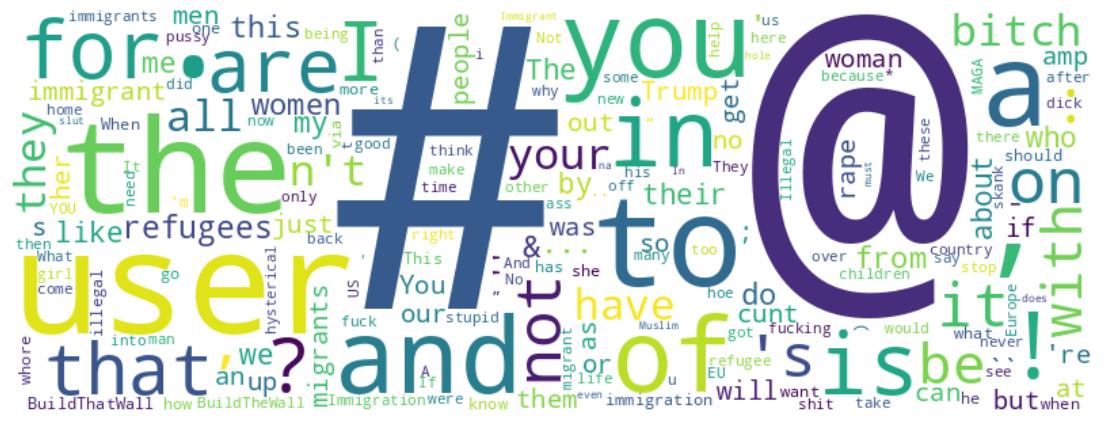

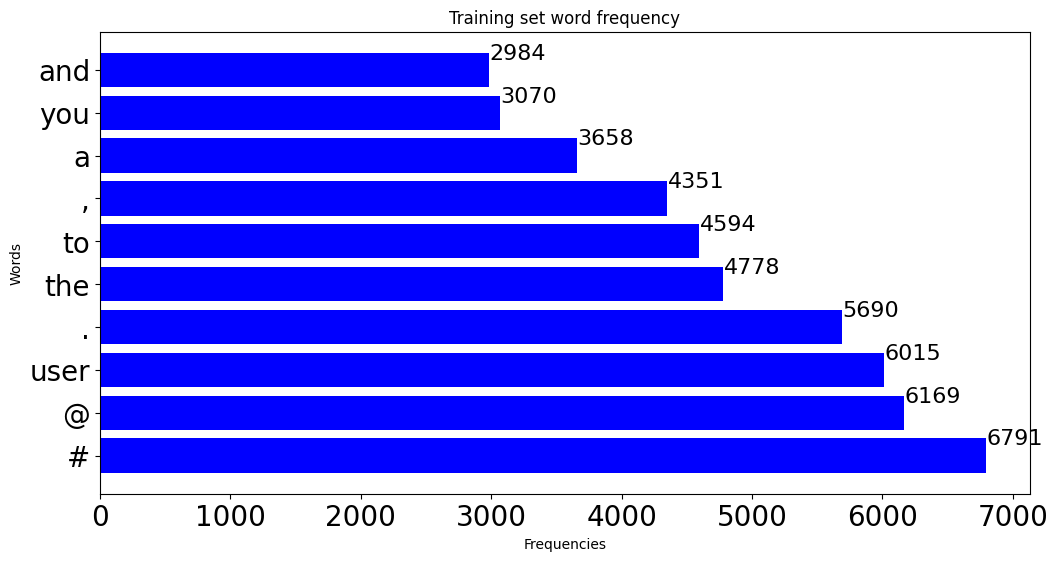

In [6]:
# getting top 200 words count in the train set 
train_top_words = get_word_count(train_tweets_df['tweets'],200)

# visualise the top words in word cloud 
word_cloud(train_top_words)


# getting top 10 words count in the train set to b plotted in bar chart
train_top_words = get_word_count(train_tweets_df['tweets'],10)
Training_plot_title = 'Training set word frequency'
bar_chart(train_top_words,Training_plot_title,figsize= (12,6))



**Visualising the top words count in the validation set before data pre-procesing**

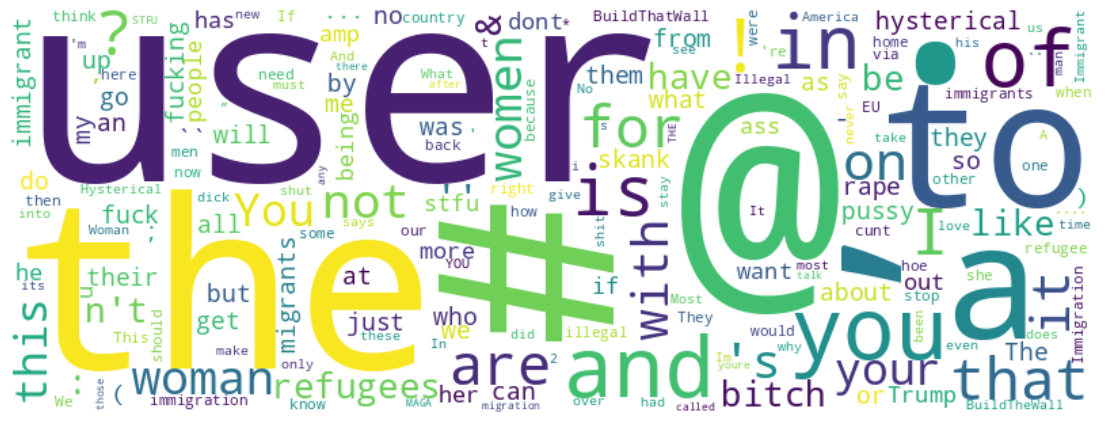

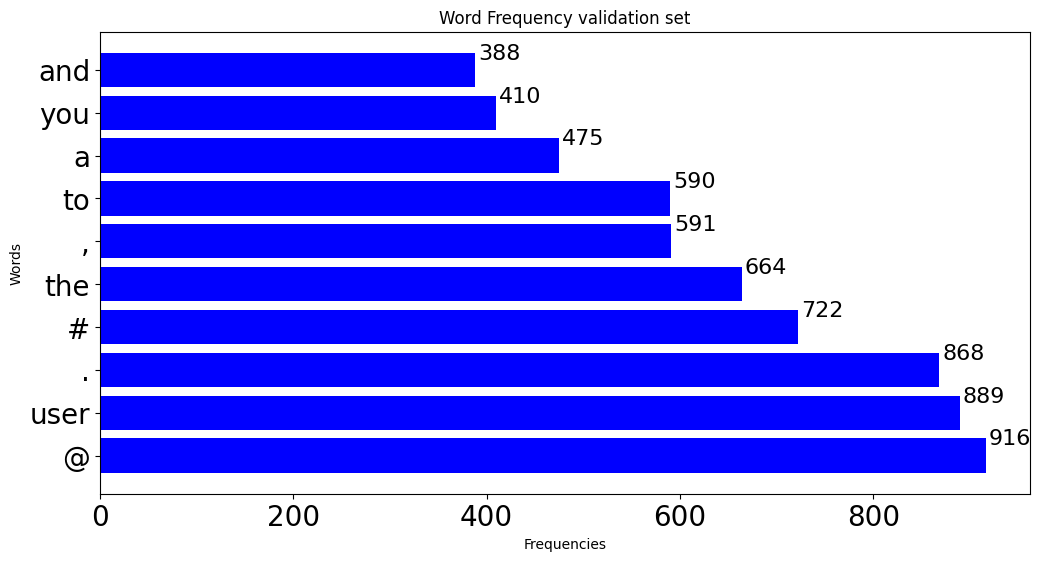

In [7]:
# getting top 200 words count in the validation set 
val_top_words = get_word_count(val_tweets_df['tweets'],200)

# visualise the top words in word cloud 
word_cloud(val_top_words)

# getting top 10 words count in the validation set to b plotted in bar chart
val_top_words = get_word_count(val_tweets_df['tweets'],10)
plot_title = 'Word Frequency validation set'
bar_chart(val_top_words,plot_title,figsize= (12,6))


**This for visualising the top words count in the test set before data pre-procesing**

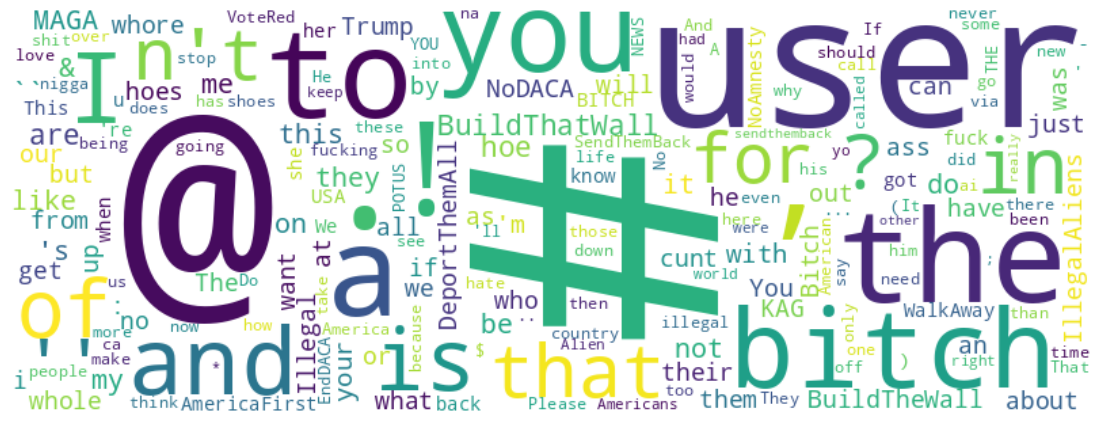

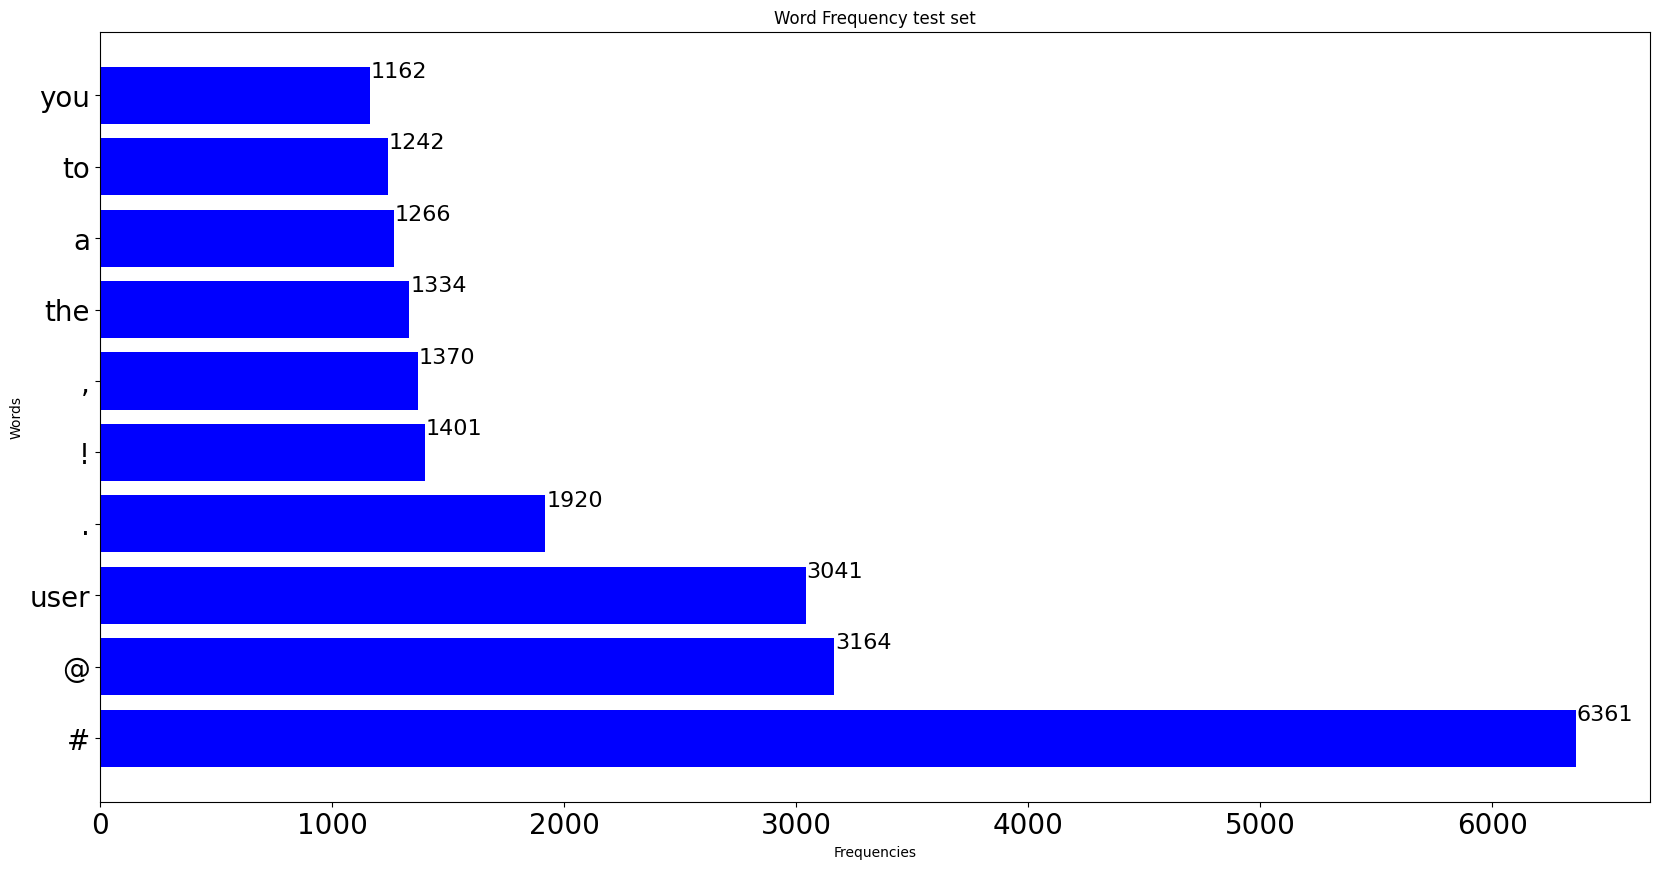

In [8]:
# getting top 200 words count in the test set 
test_top_words = get_word_count(test_tweets_df['tweets'],200)

# visualise the top words in word cloud 
word_cloud(test_top_words)

# getting top 10 words count in the test set to b plotted in bar chart
test_top_words = get_word_count(test_tweets_df['tweets'],10)
plot_title = 'Word Frequency test set'
bar_chart(test_top_words,plot_title)


**This code for analysing the hashtags that are exitst in all datasets, and then visualising them as word cloud**

Top 200 hashtags in the train set


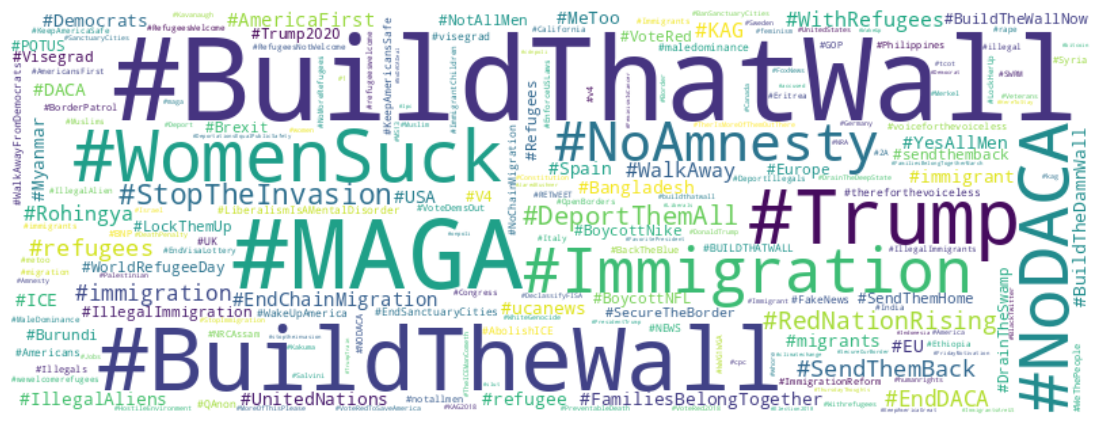


 ----------------------------------------------------------------------------------------------------------------
Top 200 hashtags in the validation set


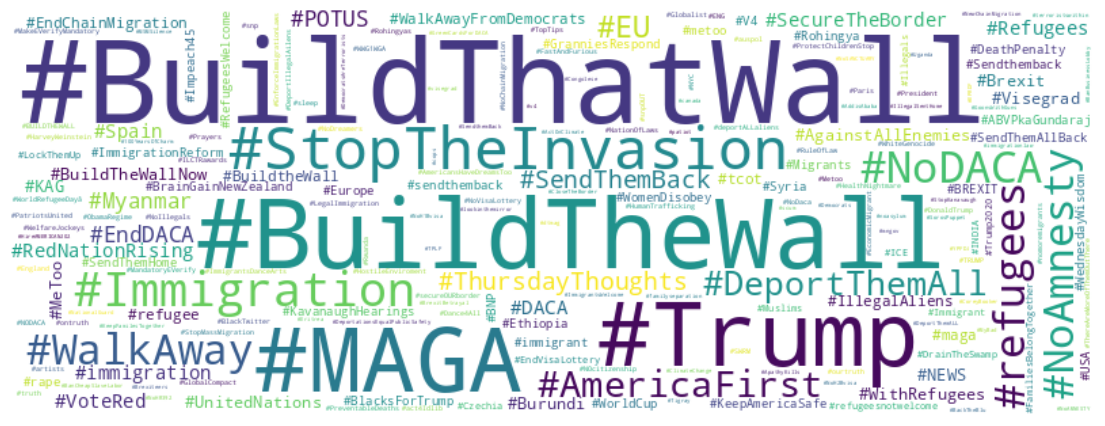


----------------------------------------------------------------------------------------------------------------
Top 200 hashtags in the test set


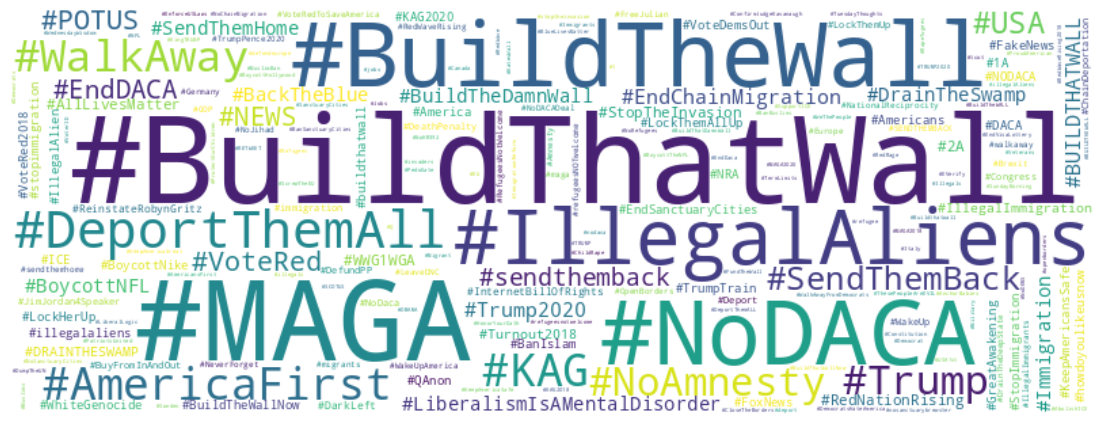

In [9]:
# loop through the train set and extract all hashtags and their names 
hashtags = []
for tweet in df_train['tweets']:
    hashtags += re.findall(r'#\w+', tweet)

#counting the number of occurance for each hashtag
hashtag_counts = Counter(hashtags)
top_hashtags = hashtag_counts.most_common(200) # get top 200 hashtags

# visualising the top 200 hashtags in the train set as word cloud 
print('Top 200 hashtags in the train set')
word_cloud(top_hashtags)

print('\n ----------------------------------------------------------------------------------------------------------------')

# loop through the validation set and extract all hashtags and their names 
hashtags = []
for tweet in df_val['tweets']:
    hashtags += re.findall(r'#\w+', tweet)
#counting the number of occurance for each hashtag
hashtag_counts = Counter(hashtags)
top_hashtags = hashtag_counts.most_common(200) # get top 200 hashtags

# visualising the top 200 hashtags in the validation set as word cloud 
print('Top 200 hashtags in the validation set')
word_cloud(top_hashtags)

print('\n----------------------------------------------------------------------------------------------------------------')
# loop through the test set and extract all hashtags and their names 
hashtags = []
for tweet in df_test['tweets']:
    hashtags += re.findall(r'#\w+', tweet)

#counting the number of occurance for each hashtag
hashtag_counts = Counter(hashtags)
top_hashtags = hashtag_counts.most_common(200) # get top 200 hashtags

# visualising the top 200 hashtags in the test set as word cloud 
print('Top 200 hashtags in the test set')
word_cloud(top_hashtags)


This code is for hashtags analaysis, that check the impact of an existing hashtag in tweet to its corrosponding labels. To check if having a tweet in an offensive hashtags affect the tweet label or not

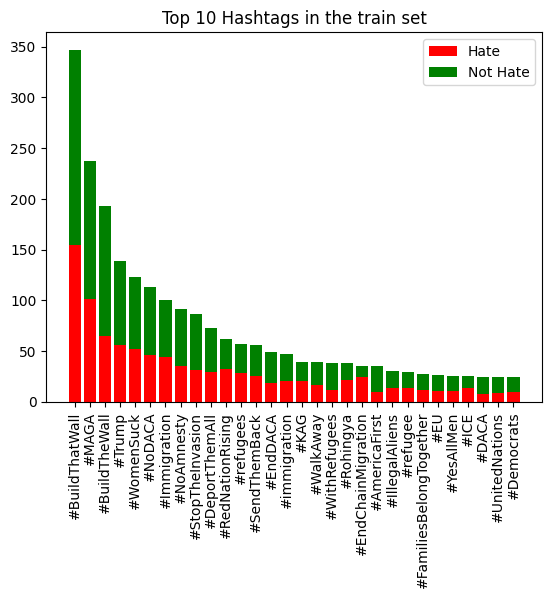

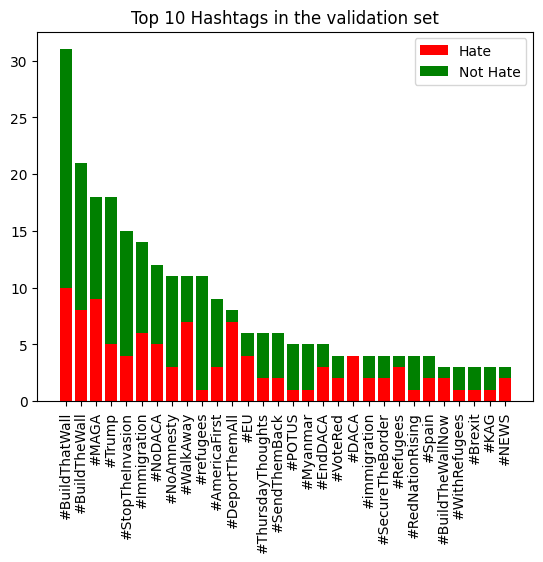

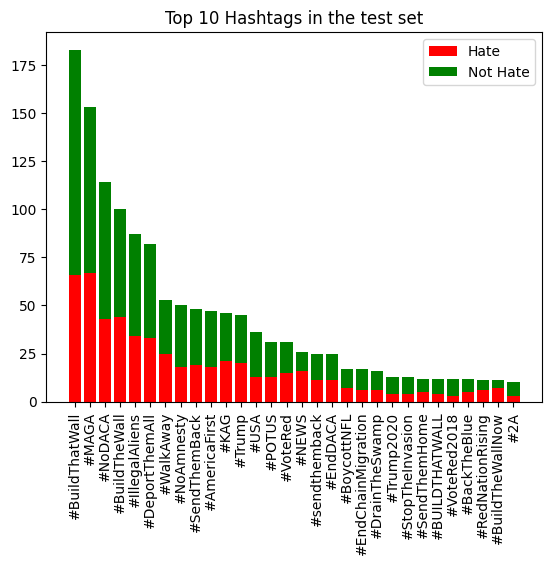

In [10]:
# This function takes data frame and titile then visualises how many hate and not-hate speech in top 10 hashtags
def hashtags_plot(df, title, top=10):
    
    # extract hashtags using regix then store them in a list with their corosponding labels 
    hashtags = []
    labels = []
    for tweet, label in zip(df['tweets'], df['labels']):
        hashtags += [hashtag for hashtag in re.findall(r'#\w+', tweet)]  # extracting hashtags and store it in hashtags list
        labels.append(label) # store labels in labels list

    # create a dictionary to store hashtags all their labels  
    hashtag_dict = {}
    for hashtag, label in zip(hashtags, labels):
        if hashtag not in hashtag_dict:
            hashtag_dict[hashtag] = [] # create a new dictionary key for the recievied hashtag
        hashtag_dict[hashtag].append(label) # storing labels of a hashtag

    # sorting the hashtag dictionary and getting the top 10
    top_hashtags = sorted(hashtag_dict.keys(), key=lambda x: len(hashtag_dict[x]), reverse=True)[:top]

    # loop through all the top 30 hashtgs and counting the occurance for each label
    for hashtag in top_hashtags:
        hate_count = hashtag_dict[hashtag].count(1) # counting hate speech in a hashtag
        not_hate_count = hashtag_dict[hashtag].count(0) # counting non-hate speech in a hashtag
        plt.bar(hashtag, hate_count, color='r')
        plt.bar(hashtag, not_hate_count, bottom=hate_count, color='g')
    plt.xticks(rotation=90)
    plt.legend(['Hate', 'Not Hate'])
    plt.title(title)
    plt.show()


#visualising top 30 for train, test, validation datasets 
hashtags_plot(df_train, 'Top 10 Hashtags in the train set', 30)
hashtags_plot(df_val, 'Top 10 Hashtags in the validation set', 30)
hashtags_plot(df_test, 'Top 10 Hashtags in the test set', 30)


## Top three hashtags

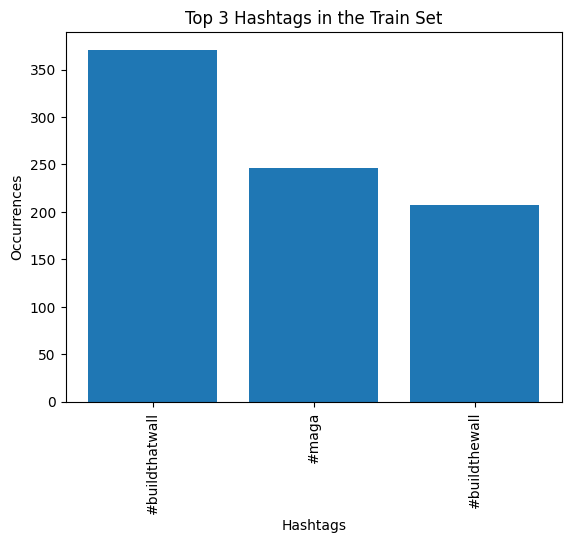

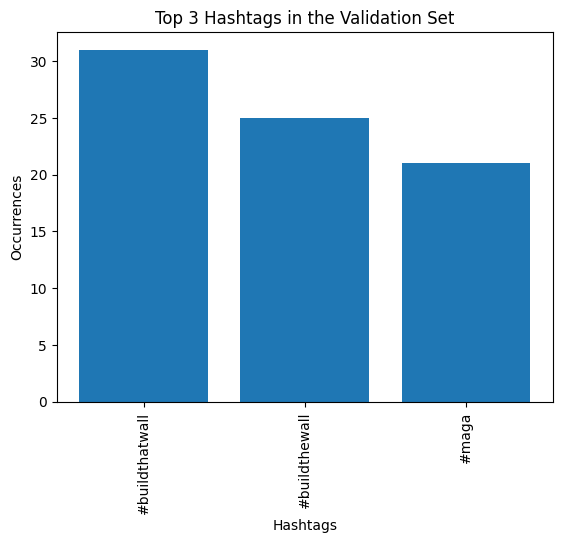

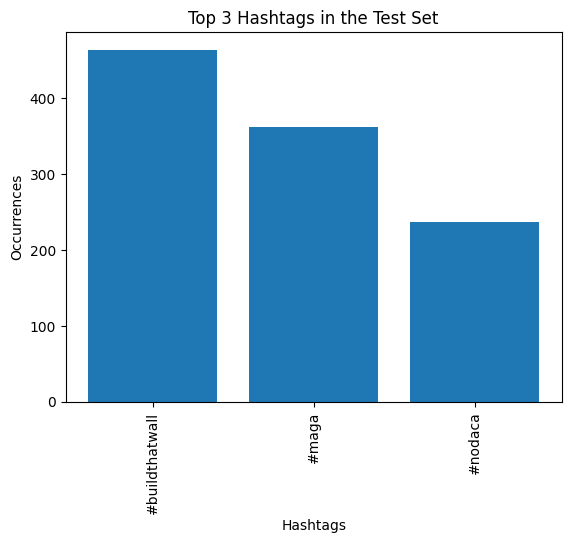

In [11]:
import re
import pandas as pd
import matplotlib.pyplot as plt

def get_top_hashtags(df, top=3):
    hashtags = []
    for tweet in df['tweets']:
        hashtags += [hashtag.lower() for hashtag in re.findall(r'#\w+', tweet)]
    
    hashtag_counts = pd.Series(hashtags).value_counts().head(top)
    return hashtag_counts

def plot_top_hashtags(df, title, top=3):
    top_hashtags = get_top_hashtags(df, top)
    
    plt.bar(top_hashtags.index, top_hashtags.values)
    plt.xticks(rotation=90)
    plt.xlabel("Hashtags")
    plt.ylabel("Occurrences")
    plt.title(title)
    plt.show()

# Plot the top 3 hashtags for each DataFrame
plot_top_hashtags(df_train, "Top 3 Hashtags in the Train Set")
plot_top_hashtags(df_val, "Top 3 Hashtags in the Validation Set")
plot_top_hashtags(df_test, "Top 3 Hashtags in the Test Set")


# DATA PROCESSING

In [12]:
# list of abbreviations and their stands
bad_abbreviations = {
"hoe":"promiscuous",
"hoes":"promiscuous",
"HOEEEEEEEEE":"promiscuous",
'bout':'about' ,
"asap":"as soon as possible",
"gn":"good night",
"wtf":"what the fuck",
"omg":"oh my god",
"bamf":"badass mother fucker",
"gtfo": "get the fuck out",
"stfu": "shut the fuck up",
"u":"you",
"pic":"picutre",
"lmao":"laughing my ass off",
"lmaooo":"laughing my ass off",
"lmaooo":"laughing my ass off",
"lmaoooo":"laughing my ass off",
"lmaooooo":"laughing my ass off",
"lmaoooooo":"laughing my ass off",
"lmaooooooo":"laughing my ass off",
"lmaoooooooo":"laughing my ass off",
"bc": "because",
"ita":"italian",
"ye":"you",
"yr":"year",
"gt":"",
"rd": "road",
"ex":"previous",
"cuz":"because",
"ppl": "people",
"nh":"",
"ngo":"non governmental organization",
"al":"",
"da":"damn ass",
"rep":"republic",
"dem":"democrat",
"amp":"",
"eu":"europe",
"rt" : "retweet",
"ur":"your",
"dm":"direct message",
"af":"as fuck",
"ho":"whore",
"ya": "you",
"bfd":"big fucking deal",
"ffs":"for fuck’s sake",
"fyfi":"for your fucking information",
"gtfo":"get the fuck out",
"tf":"the fuck",
"wth":"what the hell",
"fng":"fucking new guy",
"wtaf":"what the actual fuck",
"ruh":"are you horny",
"nfs":"need for sex",
#"BuildThatWall":"build that wall",
"maga":"make america great again",
"fucc": "fuck",
"ffuck":"fuck",
"fuuucckk":"fuck",
"fuuuuuuuuuuuuuuuuuck":"fuck",
"fucccking":"fucking",
"fuckk": "fuck",
"fuckkk": "fuck",
"biiiitch":"bitch",
"bitcch":"bitch",
"bitchh":"bitch",
"bitchhhhh": "bitch",
"f*ck": "fuck",
"fu*k": "fuck",
"f**k":"fuck",
"*uck": "fuck",
"bi**h": "bitch",
"sh*thole":"shithole",
"sh**":"shit",
"f***er":"fucker",
"dumbsh*t":"dumbshit",
"tra*h":"trash",
"F**":"fuck",
"****":"fuck",
"#cuck":"fuck",
"c@#t":"cunt",
"u":"you",
"uglyyyyyy":"ugly",
"dickkkkkkk": "dick",
"sh!t":"shit",
"sh.t":"shit",
"immigrantssssss":"immigrants",
"yrs":"years",
"cus":"because",
"cu":"because",
"hmmmmm":"hm",
"hmmmm":"hm",
"hmmm":"hm",
"hmm":"hm",
"uhhhhhh":"uh",
"uhh":"uh",
"y":"you",
"lil":"little",
"vs":"against",
"yuhhhhhhhh":"yeah",
"yuh":"yeah",
"yuhhhhhhhh":"yeah",
"yuhhhhhhhh":"yeah",
"Govt":"government",
"via":"",
"rt":"",
"oh":"",
}

emojies = {
    
"🖕":"dick",
"😉": "winkingface",
"😏":"winkingface",
"😷":"maskface",
"🌵":"dick",
"❌":"not",
"🤧":"sneezing",
"🤬":"angry",
"💦":"ejaculates",
"😡":"angry",
"😠":"angry",
"😤":"angry",
"😈":"evil",
"😂":"laugh",
"💪":"fist",
"👊":"fist",
"✊":"fist",
"😝":"tongueface",
"🤘🏼":"horns",
"💀":"evil",
"🤢":"nasty",
"😍":"smiling",
"🍆":"dick",
"👅":"suck",
"💃🏻":"danc",
"🤤":"thirsty",
"🚮":"trash",
"🙂":"smile",
"🙄":"think",
"😒":"sad",
"😛":"suck",
"🔥":"hot",
"❗️":"exclamation",
"💩":"shit",
"👏🏾":"slap",
}

bad_words = ['build','invasion','ugly','wall','them',' amnesty','back','illegal','migration','dumbshit','shithole','promiscuous','slap','shit','trash','suck','nasty','horns','ejaculates','dick','hoes','cunt','woman', 'refugee', 'bitch', 'immigrant', 'illegal', 'muslim', 'american', 'america', 'europe', 'white', 'fucking', 'fuck', 'whore', 'rape', 'stupid', 'pussy', 'shit', 'crazy', 'fuckin', 'christian', 'ugly', 'nigga', 'cock', 'sex', 'die', 'kill', 'man', 'dick', 'dumb', 'oriental', 'continental']

# Data pre-processing
In this process, text data is pre-processed, cleaned, and transformed to remove inconsistencies and noise, to standardise and simplify text, and to prepare it for analysis and modelling. This include:
1. Preliminary Processing
2. Replacing Contractions
3. Replacing Hashtags
4. Replacing Digits Within Words
5. Replacing Emojis
6. Word Tokenizing
7. Removing Stopwords
8. Replacing Abbreviations
9. Replacing Important Words and Similarity Check
10. Lemmatizing

In [13]:
df_train = df_train.drop_duplicates().reset_index(drop=True) # remove duplicates in the train set
df_val = df_val.drop_duplicates().reset_index(drop=True) # remove duplicates in the validation set
df_test = df_test.drop_duplicates().reset_index(drop=True) # remove duplicates in the test set


# in this code we use  text_processor which a class that we store it in seprate file in this path: dataset/text_processor.py 
'''   
How to use text_processor
attributes with default values are:
        remove_stopwords = True
        replace_hashtags = True
        remove_hashtags = False
        replace_urls = True
        replace_digits = True
        replace_emojis = True
        lemmatize = False
        replace_abbreviations = True
        replace_contractions = True
        remove_mentions = False
'''
text_processor = TextProcessor(
    abbreviations=bad_abbreviations,
    important_words=bad_words,
    emoji_data=emojies,
)
text_processor.remove_hashtags=True
text_processor.lemmatize = True
text_processor.pre_regex = True
text_processor.remove_stopwords = True


df_train_processed = text_processor.process_dataframe(df_train[['tweets']], 'tweets')
df_test_processed = text_processor.process_dataframe(df_test[['tweets']], 'tweets')
df_val_processed = text_processor.process_dataframe(df_val[['tweets']], 'tweets')

# Data analysis after cleaning

------------------------------------ Train set --------------------------------------


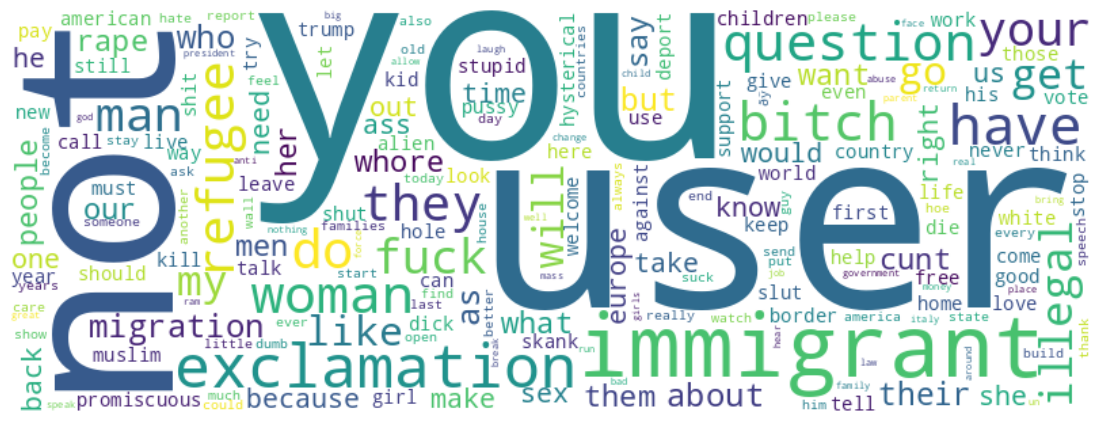

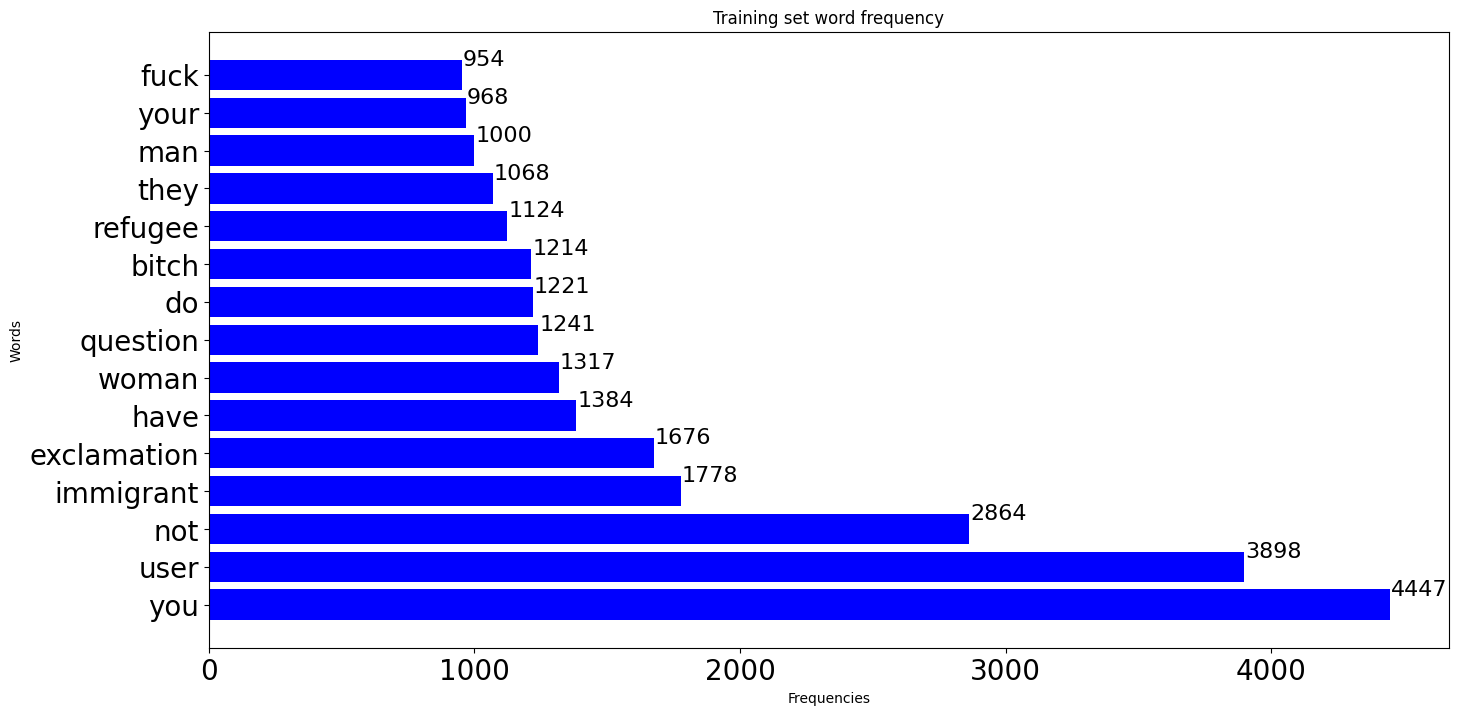

----------------------------------- Validation set --------------------------------------


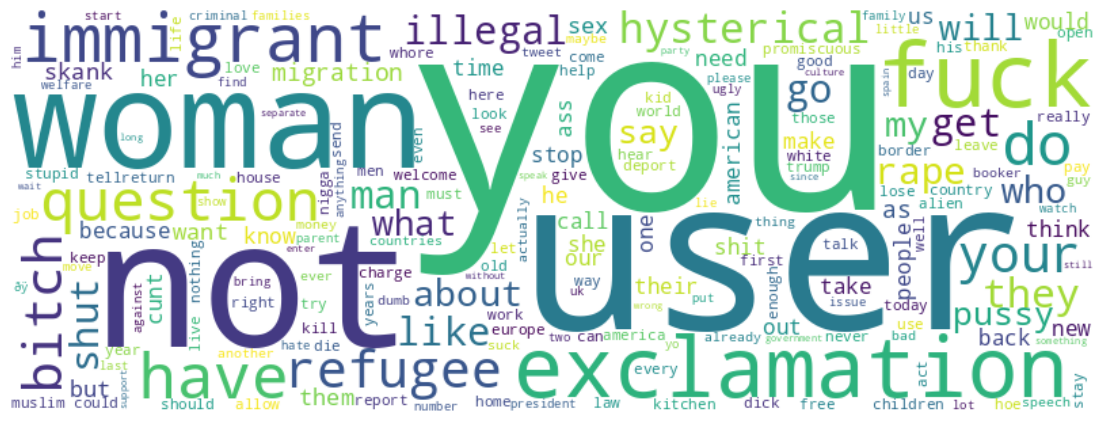

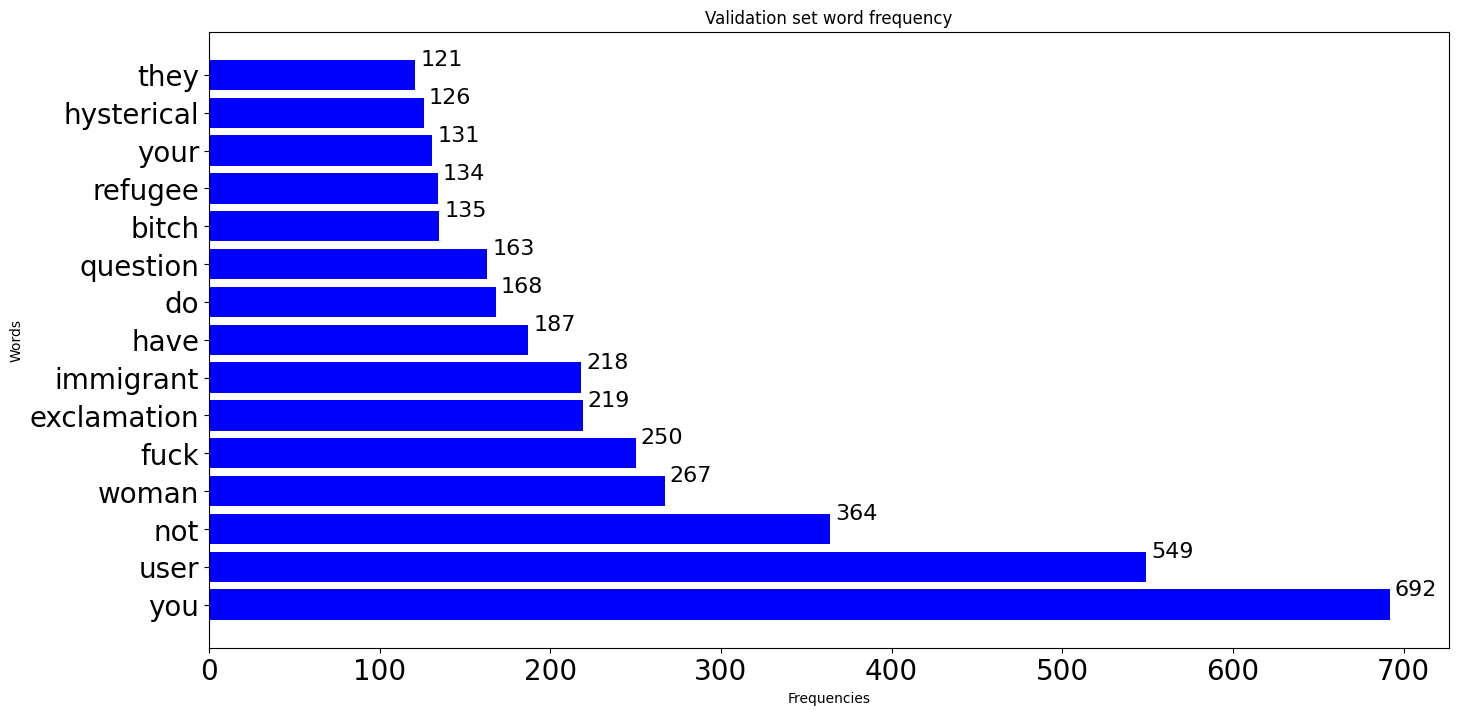

------------------------------------ Test set --------------------------------------


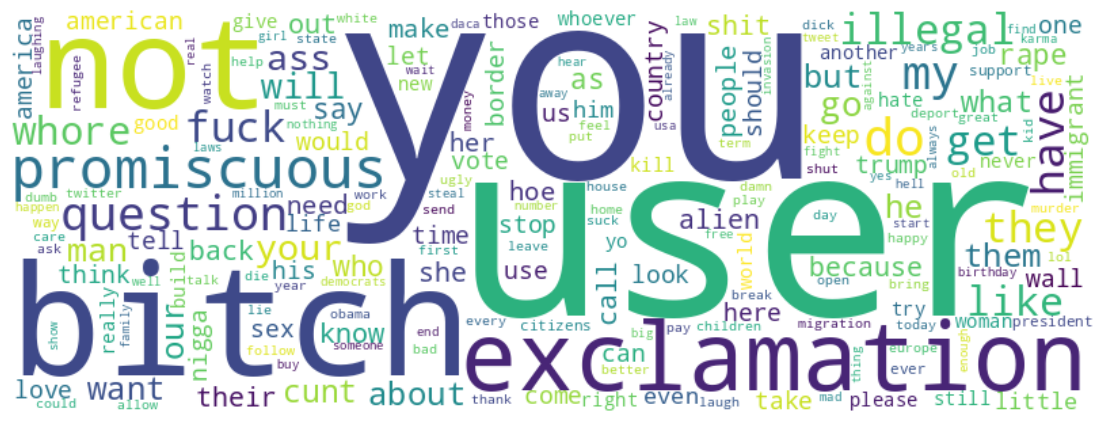

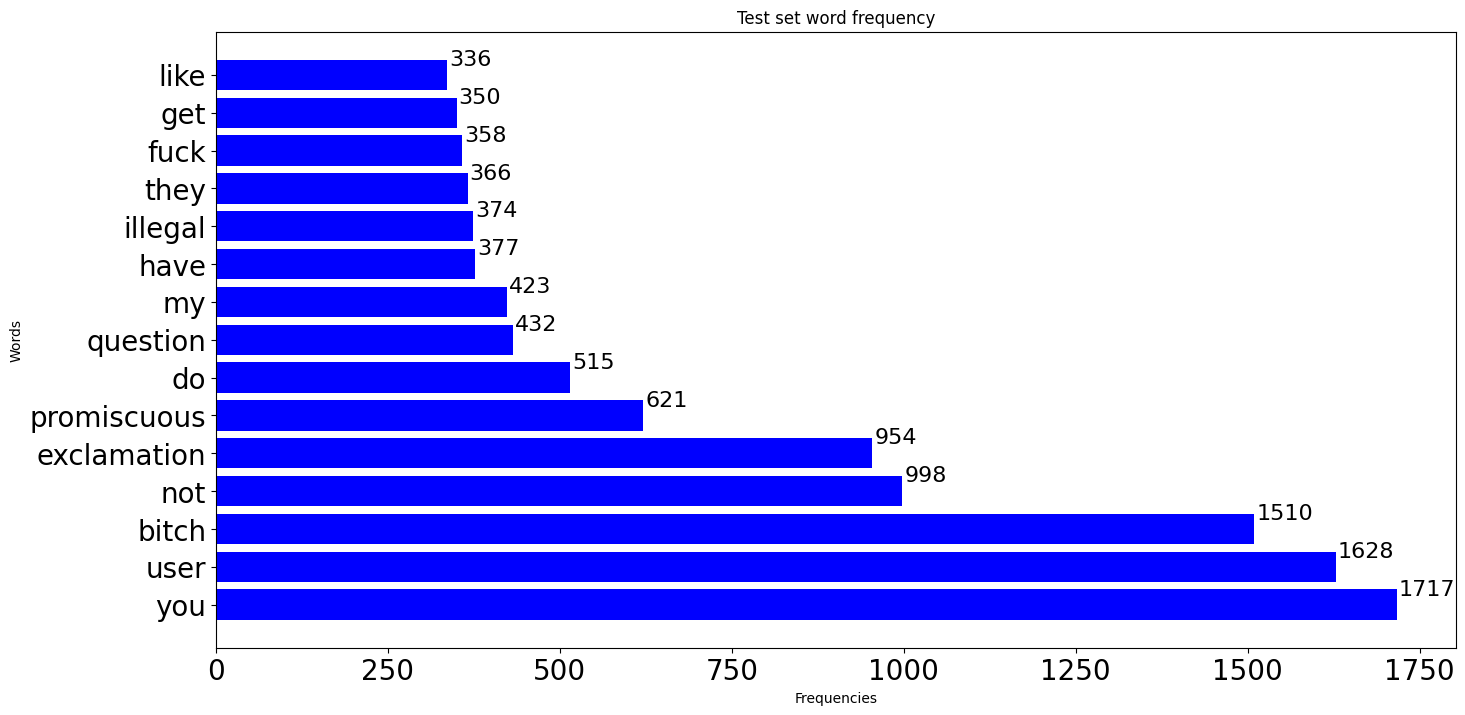

In [14]:
#top words count in the train set
print('------------------------------------ Train set --------------------------------------')
train_top_words = get_word_count(df_train_processed['tweets'],200)
word_cloud(train_top_words)
Training_plot_title = 'Training set word frequency'
train_top_words = get_word_count(df_train_processed['tweets'],15)
bar_chart(train_top_words,Training_plot_title,figsize= (16,8))

print('----------------------------------- Validation set --------------------------------------')
#top words count in the train set
val_top_words = get_word_count(df_val_processed['tweets'],200)
word_cloud(val_top_words)
val_plot_title = 'Validation set word frequency'
val_top_words = get_word_count(df_val_processed['tweets'],15)
bar_chart(val_top_words,val_plot_title,figsize= (16,8))

print('------------------------------------ Test set --------------------------------------')
#top words count in the train set
test_top_words = get_word_count(df_test_processed['tweets'],200)
word_cloud(test_top_words)
Test_plot_title = 'Test set word frequency'
test_top_words = get_word_count(df_test_processed['tweets'],15)
bar_chart(test_top_words,Test_plot_title,figsize= (16,8))

